# Fully connected network eli suomeksi täysin kytketty verkko ja sen  treenaaminen CIFAR-10 datasetillä

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import backend as K
print(K.backend())

tensorflow


# Datan esikäsittely
Kuvat ovat 32x32 pikseliä ja sisältävät 3 kanavaa (RGB). Jokainen kuva on muunnettu yksiulotteiseksi vektoriksi, jossa on 3072 elementtiä (32 × 32 × 3).

Pikseliarvot on normalisoitu skaalaan 0-1, jotta malli voi oppia tehokkaammin ja minimoida numeristen arvojen aiheuttamat ongelmat.

Testi- ja validointidatan erottelu on tehty validation_split-parametrilla.

Vastemuuttujaa ei ole muutettu one-hot-enkoodattuun muotoon, koska käytämme SparseCategoricalCrossentropy-tappiota, joka tukee suoraan kokonaislukuarvoja (0–9) luokkina.

# Mallin rakennus
Mallissa käytetään useita täysin kytkettyjä Dense kerroksia, joissa on ReLU-aktivaatioita ei-lineaarisuuden lisäämiseksi.

Ensimmäinen kerros sisältää 1024 neuronia, toinen 512 neuronia ja kolmas 256 neuronia.

Viimeinen kerros on 10-neuroninen softmax-kerros, joka tuottaa todennäköisyysjakauman kymmenelle CIFAR-10-luokalle.

Dropout-kerroksia tai normalisointia ei ole käytetty, joten malli pyrkii tehokkaaseen oppimiseen ilman suoranaista yliopetuksen estoa.

Malli käyttää Adam-optimointialgoritmia ja SparseCategoricalCrossentropy-tappiota, joka sopii hyvin usean luokan luokittelutehtäviin.

In [3]:
# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(1024, activation="relu")(inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

2025-03-27 10:15:18.887232: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-27 10:15:18.887263: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-27 10:15:18.887268: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1743063318.887308  952459 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1743063318.887353  952459 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.reshape(50000, 3072).astype("float32") / 255
x_test = x_test.reshape(10000, 3072).astype("float32") / 255

In [6]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

## Mallin kouluttaminen
Malli koulutetaan 15 epookilla ja eräkoko on 500. Validointidata on 20% koulutusdatan koosta.

In [7]:
history = model.fit(x_train, y_train, batch_size=500, epochs=15, validation_split=0.2)

Epoch 1/15


2025-03-27 10:15:21.298718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.1820 - loss: 2.4647 - val_accuracy: 0.3125 - val_loss: 1.9093
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3266 - loss: 1.8771 - val_accuracy: 0.3496 - val_loss: 1.7860
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3773 - loss: 1.7414 - val_accuracy: 0.3875 - val_loss: 1.7118
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4072 - loss: 1.6618 - val_accuracy: 0.4130 - val_loss: 1.6569
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4266 - loss: 1.6014 - val_accuracy: 0.4314 - val_loss: 1.6233
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4468 - loss: 1.5582 - val_accuracy: 0.4306 - val_loss: 1.5946
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4632 - loss: 1.5145 - val_accuracy: 0.4323 - val_loss: 1.5938
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4635 - loss: 1.4989 - val_accuracy: 0.4529 - val_loss: 1.

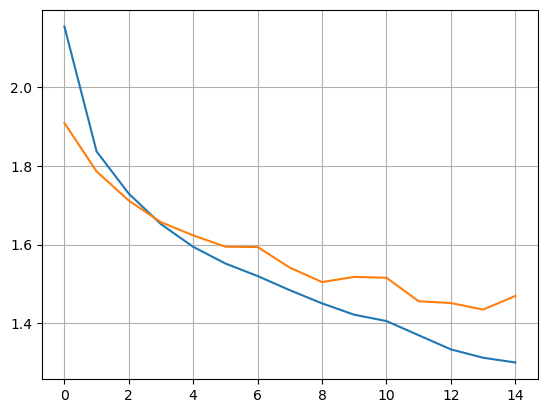

In [8]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

# Mallin arviointi
Testin loss on noin 1.42
Testitarkkuus on noin 50%

In [9]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - 4ms/step - accuracy: 0.4872 - loss: 1.4438
Test loss: 1.4437531232833862
Test accuracy: 0.487199991941452


## Visuaalisten tulosten tulkinta
Pylväsdiagrammi näyttää, kuinka todennäköisesti malli uskoo kuvan kuuluvan jokaiseen kategoriaan.
0 = Airplane

1 = Automobile

2 = Bird

3 = Cat

4 = Deer

5 = Dog

6 = Frog

7 = Horse

8 = Ship

9 = Truck


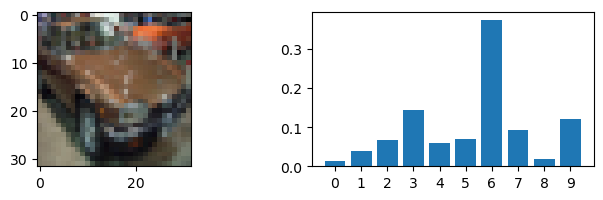

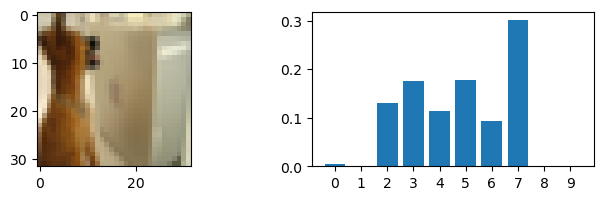

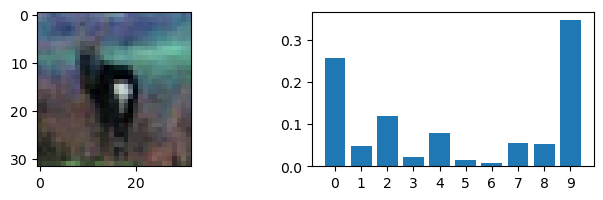

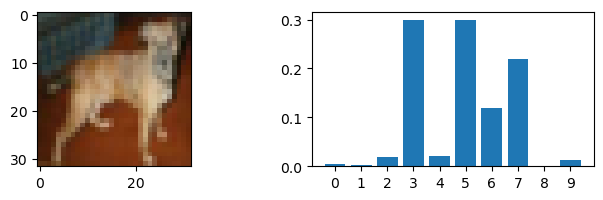

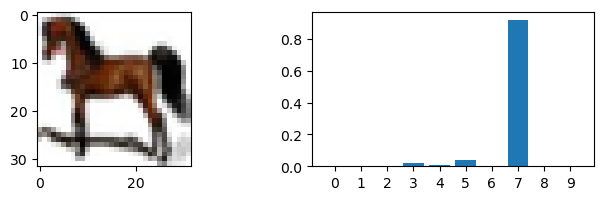

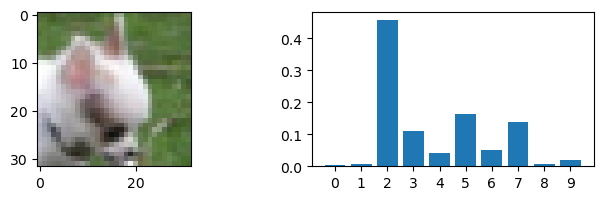

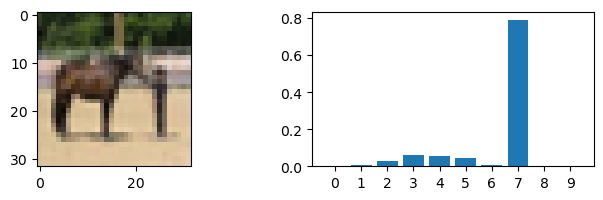

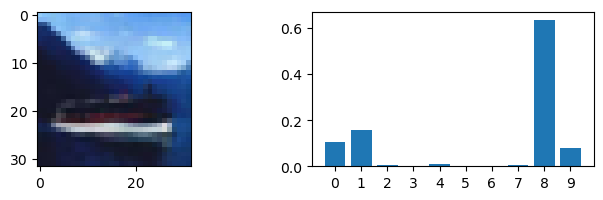

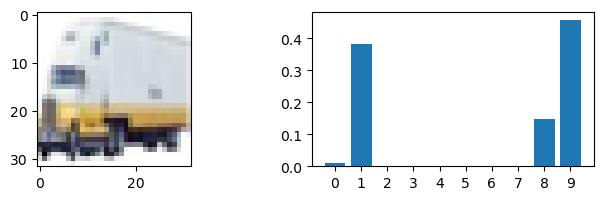

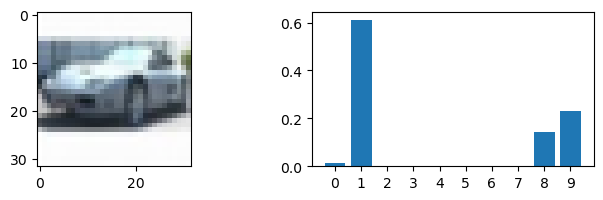

In [10]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32,3)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.bar(ind, y[start+k].numpy().flatten())
    plt.xticks(range(10))

# Analyysi vääristä ennusteista

Läheiset luokat voivat aiheuttaa vääriä ennusteita, koska malli ei pysty erottamaan niitä toisistaan.

Esim. koira vs. kissa
Eläinten samankaltaiset ominaispiirteet

Vaikeat reunatapaukset:
Kuvat, joissa useita objekteja
Epäselvät tai osittain peitetyt kohteet

Heikko konvoluutiokerrosten suorituskyky on myös iso osa vääriä ennusteita.

# Visuaalinen vertailu:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


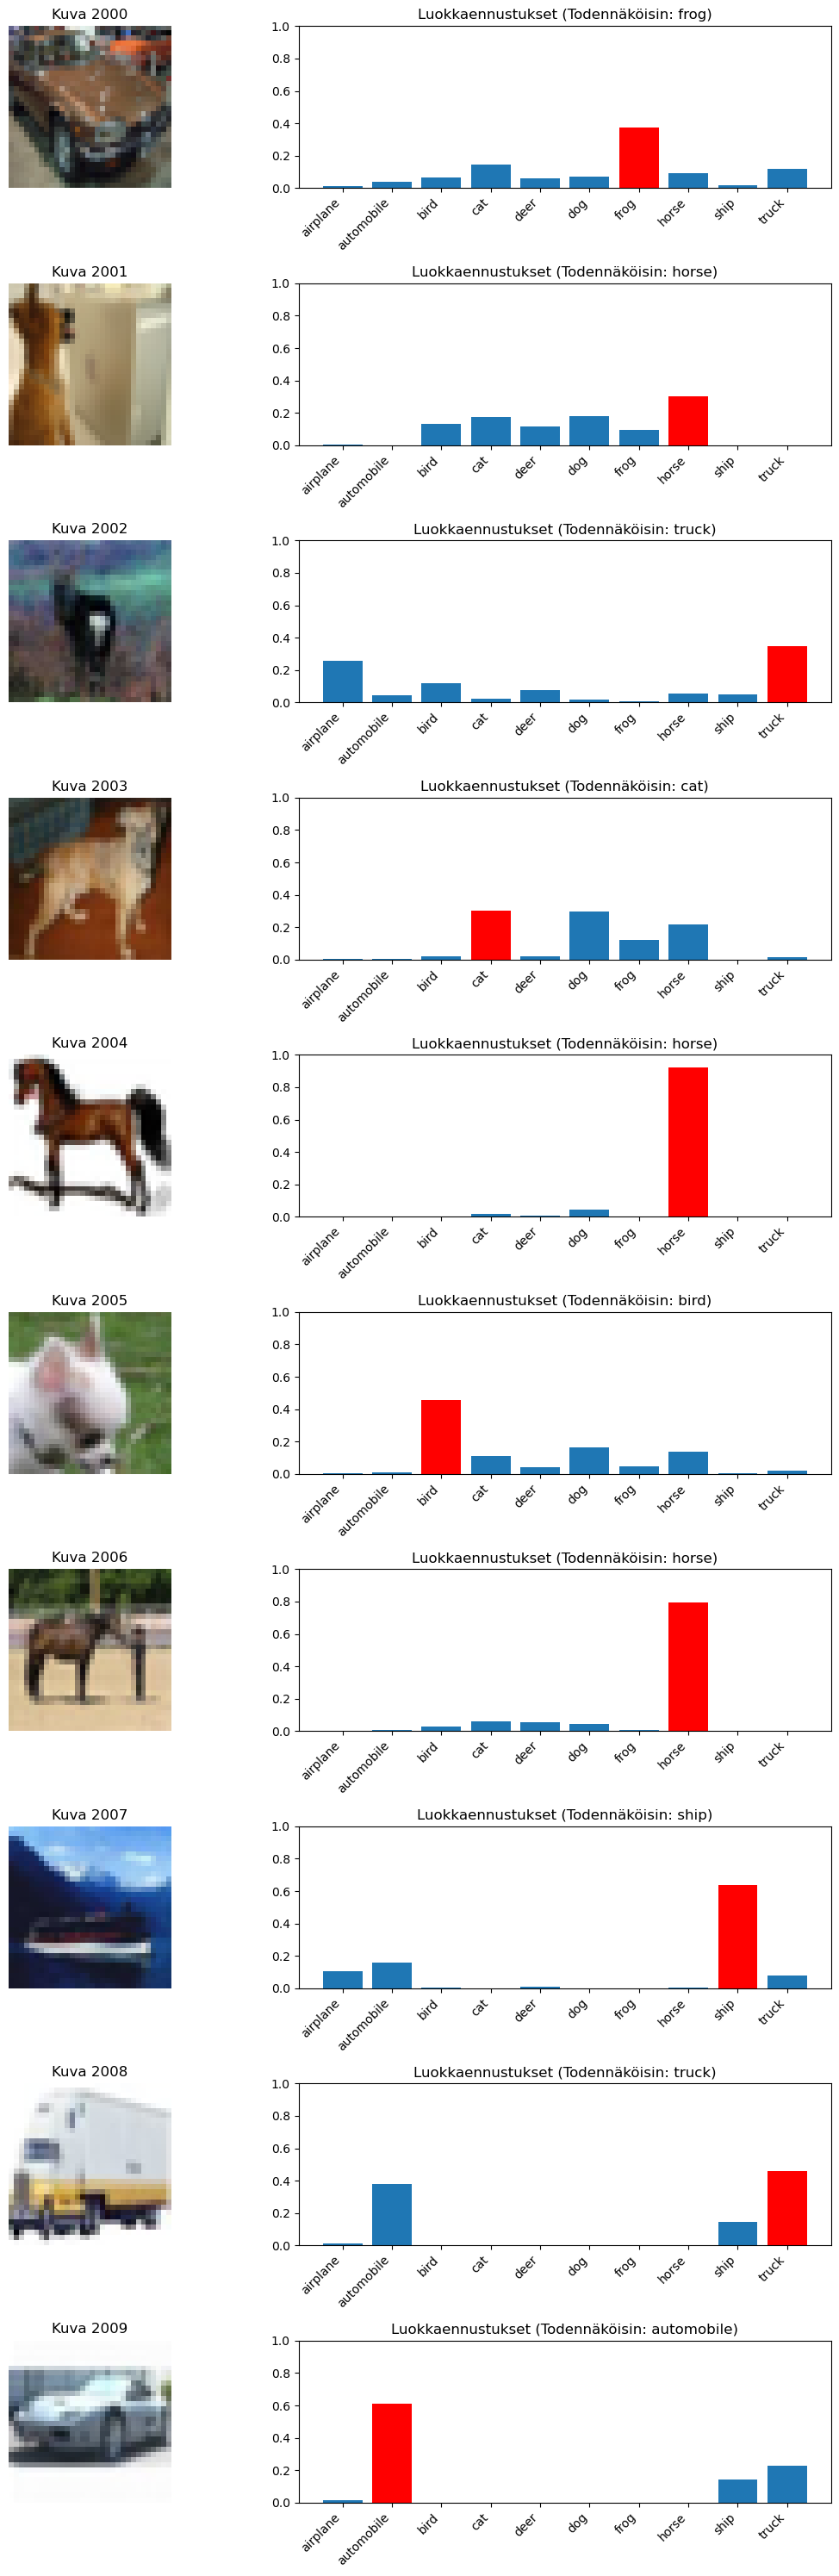

In [11]:
def visualize_model_predictions(x_test, model, start_index=2000, num_samples=10, class_names=None):
    if class_names is None:
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                       'dog', 'frog', 'horse', 'ship', 'truck']
    
    y_pred = model.predict(x_test[start_index:start_index+num_samples])
    
    fig, axs = plt.subplots(num_samples, 2, figsize=(12, 3*num_samples))
    
    for k in range(num_samples):
        axs[k, 0].imshow(x_test[start_index+k].reshape((32, 32, 3)))
        axs[k, 0].set_title(f'Kuva {start_index+k}')
        axs[k, 0].axis('off')
        
        ind = np.arange(10)
        pred_probs = y_pred[k]
        axs[k, 1].bar(ind, pred_probs)
        axs[k, 1].set_xticks(ind)
        axs[k, 1].set_xticklabels(class_names, rotation=45, ha='right')
        axs[k, 1].set_title(f'Luokkaennustukset (Todennäköisin: {class_names[np.argmax(pred_probs)]})')
        axs[k, 1].set_ylim(0, 1)
        
        max_index = np.argmax(pred_probs)
        axs[k, 1].patches[max_index].set_facecolor('red')
    
    plt.tight_layout()
    plt.show()
    
visualize_model_predictions(x_test, model)